In [1]:
%load_ext autoreload
%autoreload 2

# Imports

### Standard imports

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

### Lattice imports

In [8]:
from collections import OrderedDict
from gridsearch import experiment, load_experiment

# Create NARMA dataset

In [4]:
import dataset as ds

u_train, y_train = ds.NARMA(sample_len = 2000)
u_test, y_test = ds.NARMA(sample_len = 3000)
dataset = [u_train, y_train, u_test, y_test]
ds.dataset = dataset

# Waxman graph generation

In [5]:
from matrix import waxman
from plot import scatter_3d

### Waxman visualization

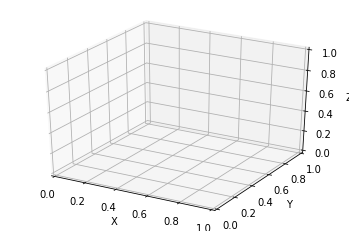

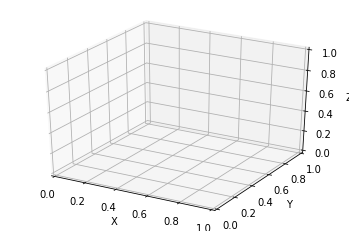

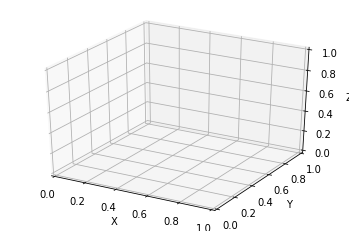

In [6]:
for z_frac in [0.0, 0.5, 1.0]:
    G = waxman(n=200, alpha=1.0, beta=1.0, z_frac=z_frac)
    scatter_3d(G)

### Waxman performance with increasing fraction of 3d nodes

In [ ]:
from metric import esn_nrmse

params = OrderedDict()
params['w_res_type'] = ['waxman']
params['hidden_nodes'] = np.arange(20, 90, 10)
params['z_frac'] = np.arange(0.0, 1.2, 0.2)
params['directed'] = [True, False]
waxman_nrmse_df = experiment(esn_nrmse, params)
waxman_nrmse_df.to_pickle('experiments/waxman_nrmse.pkl')

In [ ]:
from metric import esn_nrmse

params = OrderedDict()
params['w_res_type'] = ['waxman']
params['hidden_nodes'] = np.arange(20, 110, 10)
params['z_frac'] = np.arange(0.0, 0.8, 0.2)
waxman_nrmse_df = experiment(esn_nrmse, params)
waxman_nrmse_df.to_pickle('experiments/waxman_nrmse.pkl')

In [ ]:
from plot import plot_df_trisurf

if 'waxman_nrmse_df' not in locals():
    waxman_nrmse_df = load_experiment('experiments/waxman_nrmse.pkl')

undirected_df = waxman_nrmse_df.loc[waxman_nrmse_df['directed'] == False]
directed_df = waxman_nrmse_df.loc[waxman_nrmse_df['directed'] == True]

zlim=(0.5, 1.0)
azim=130

plot_df_trisurf(df=undirected_df,
                groupby=['hidden_nodes', 'z_frac'],
                axes=['hidden_nodes', 'z_frac', 'esn_nrmse'],
                azim=azim, zlim=zlim, title='Undirected')
plot_df_trisurf(df=directed_df,
                groupby=['hidden_nodes', 'z_frac'],
                axes=['hidden_nodes', 'z_frac', 'esn_nrmse'],
                azim=azim, zlim=zlim, title='Directed')

There does not seem to be a difference when changing from undirected to directed  
graphs, which I attribute to the fact that I think that both methods are  
saturating the activations of hidden nodes anyway, so it does not matter.  

The hypothesis that nodes are being saturated are backed up by the fact that the  
error _decreases_ as the networks become smaller, indicating that we are  
reaching a point where nodes may begin to desaturate.  

### Waxman performance with increasing fraction of negative weights

In [ ]:
from metric import esn_nrmse

params = OrderedDict()
params['w_res_type'] = ['waxman']
params['z_frac'] = [1.0]
params['hidden_nodes'] = np.arange(20, 90, 10)
params['sign_frac'] = np.arange(0.0, 0.55, 0.05)
params['directed'] = [True, False]
waxman_sign_df = experiment(esn_nrmse, params)
waxman_sign_df.to_pickle('experiments/waxman_sign.pkl')

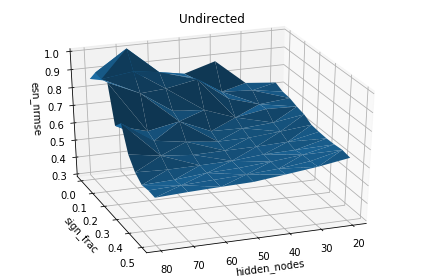

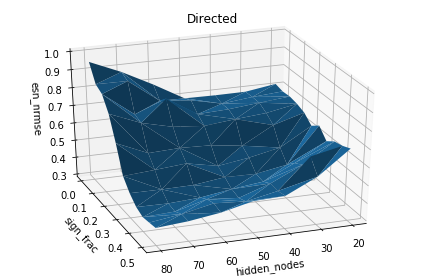

In [17]:
from plot import plot_df_trisurf

if 'waxman_sign_df' not in locals():
    waxman_sign_df = load_experiment('experiments/waxman_sign.pkl')

undirected_df = waxman_sign_df.loc[waxman_sign_df['directed'] == False]
directed_df = waxman_sign_df.loc[waxman_sign_df['directed'] == True]

azim=70
zlim=(0.3, 1.0)

plot_df_trisurf(df=undirected_df,
                groupby=['hidden_nodes', 'sign_frac'],
                axes=['hidden_nodes', 'sign_frac', 'esn_nrmse'],
                azim=azim, zlim=zlim, title='Undirected')
plot_df_trisurf(df=directed_df,
                groupby=['hidden_nodes', 'sign_frac'],
                axes=['hidden_nodes', 'sign_frac', 'esn_nrmse'],
                azim=azim, zlim=zlim, title='Directed')

We see what happens with the undirected (as we think this to be the most  
relevant for physical computing) type of graph in three dimensions, as the  
previous results show little difference between 2 and 3 dimensions.  

There is a noticeable difference between the directed and undirected graphs  
here. Dale et al. investigates this a bit in their paper: «It then becomes clear  
that how weights are struc- tured and directed, controlling information flow,  
has a greater affect on quality of the network. This supports similar results  
using hierarchical networks, where structure and number of parameters also  
significantly impact performance [6].»  

### Waxman performance with changing weight/distance function

In [ ]:
from metric import esn_nrmse
from matrix import euclidean

# We need names for the distance functions to select them from a pandas
# dataframe later.

euc = euclidean
def inv(x, y): return 1/euclidean(x, y)
def inv_squared(x, y): return 1/euclidean(x, y)**2

params = OrderedDict()
params['w_res_type'] = ['waxman']
params['z_frac'] = np.arange(0.0, 1.2, 0.2)
params['hidden_nodes'] = np.arange(20, 90, 10)
params['dist_function'] = [euc, inv, inv_squared]
waxman_dist_df = experiment(esn_nrmse, params)
waxman_dist_df.to_pickle('experiments/waxman_dist.pkl')

In [ ]:
from plot import plot_df_trisurf

if 'waxman_dist_df' not in locals():
    waxman_dist_df = load_experiment('experiments/waxman_dist.pkl')

euc_df = waxman_dist_df.loc[waxman_dist_df['dist_function'] == euc]
inv_df = waxman_dist_df.loc[waxman_dist_df['dist_function'] == inv]
inv_squared_df = waxman_dist_df.loc[waxman_dist_df['dist_function'] == inv_squared]

zlim=(0.3, 1.0)
azim=110

plot_df_trisurf(df=euc_df,
                groupby=['hidden_nodes', 'z_frac'],
                axes=['hidden_nodes', 'z_frac', 'esn_nrmse'],
                azim=azim, zlim=zlim, title='d')
plot_df_trisurf(df=inv_df,
                groupby=['hidden_nodes', 'z_frac'],
                axes=['hidden_nodes', 'z_frac', 'esn_nrmse'],
                azim=azim, zlim=zlim, title='1/d')
plot_df_trisurf(df=inv_squared_df,
                groupby=['hidden_nodes', 'z_frac'],
                axes=['hidden_nodes', 'z_frac', 'esn_nrmse'],
                azim=azim, zlim=zlim, title='1/d^2')

From a short preliminary study: it does not seem like different distance  
functions such as d, 1/d, 1/d^2 and 1/d^3 make much of a difference at all. This  
was tested both with what's shown above, as well as manually with increased size  
of the waxman volume (to ensure that we don't have a majority of <1 elements).  

Another interesting thing to plot is the probability distribution of the weights  
to compare between the dimensionalities.  

# Lattice/tiling experiments (sq, rect, hex, tri)

### Plots of lattices

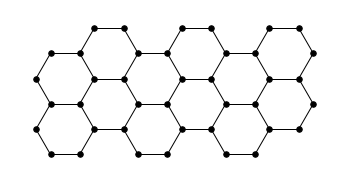

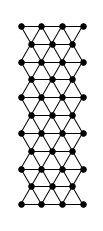

In [20]:
from ESN import ESN
from plot import plot_lattice

esn_square = ESN(hidden_nodes=25, w_res_type='tetragonal')
esn_hex = ESN(hidden_nodes=25, w_res_type='hexagonal')
esn_tri = ESN(hidden_nodes=25, w_res_type='triangular')

G_square = esn_square.G
G_pos_square = nx.get_node_attributes(G_square, 'pos')
G_hex = esn_hex.G
G_pos_hex = nx.get_node_attributes(G_hex, 'pos')
G_tri = esn_tri.G
G_pos_tri = nx.get_node_attributes(G_tri, 'pos')

plot_lattice(G_hex)
plot_lattice(G_tri)

### Lattice NRMSE

In [29]:
from metric import esn_nrmse

params = OrderedDict()
params['hidden_nodes'] = [9, 16, 25, 36, 49, 64, 81]
params['w_res_type'] = ['tetragonal', 'hexagonal', 'triangular']
nrmse_df = experiment(esn_nrmse, params)
nrmse_df.to_pickle('experiments/lattice_nrmse.pkl')

{'hidden_nodes': 9, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 9, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 9, 'w_res_type': 'triangular'}


{'hidden_nodes': 16, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 16, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 16, 'w_res_type': 'triangular'}


{'hidden_nodes': 25, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 25, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 25, 'w_res_type': 'triangular'}


{'hidden_nodes': 36, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 36, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 36, 'w_res_type': 'triangular'}


{'hidden_nodes': 49, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 49, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 49, 'w_res_type': 'triangular'}


{'hidden_nodes': 64, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 64, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 64, 'w_res_type': 'triangular'}


{'hidden_nodes': 81, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 81, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 81, 'w_res_type': 'triangular'}


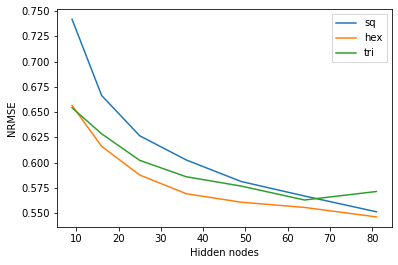

In [32]:
if 'nrmse_df' not in locals():
    nrmse_df = load_experiment('experiments/lattice_nrmse.pkl')

grouped_df = nrmse_df.groupby(['hidden_nodes', 'w_res_type']).mean().reset_index()

tetragonal = grouped_df.loc[grouped_df['w_res_type'] == 'tetragonal']
hexagonal = grouped_df.loc[grouped_df['w_res_type'] == 'hexagonal']
triangular = grouped_df.loc[grouped_df['w_res_type'] == 'triangular']

plt.plot(tetragonal['hidden_nodes'], tetragonal['esn_nrmse'], label='sq')
plt.plot(hexagonal['hidden_nodes'], hexagonal['esn_nrmse'], label='hex')
plt.plot(triangular['hidden_nodes'], triangular['esn_nrmse'], label='tri')

plt.legend(fancybox=False, loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.ylabel('NRMSE')
plt.xlabel('Hidden nodes')

plt.show()

### Lattice STM

In [33]:
from metric import esn_mc

params = OrderedDict()
params['hidden_nodes'] = [9, 16, 25, 36, 49, 64, 81]
params['w_res_type'] = ['tetragonal', 'hexagonal', 'triangular']
mc_df = experiment(esn_mc, params)
mc_df.to_pickle('experiments/lattice_mc.pkl')

{'hidden_nodes': 9, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 9, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 9, 'w_res_type': 'triangular'}


{'hidden_nodes': 16, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 16, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 16, 'w_res_type': 'triangular'}


{'hidden_nodes': 25, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 25, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 25, 'w_res_type': 'triangular'}


{'hidden_nodes': 36, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 36, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 36, 'w_res_type': 'triangular'}


{'hidden_nodes': 49, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 49, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 49, 'w_res_type': 'triangular'}


{'hidden_nodes': 64, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 64, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 64, 'w_res_type': 'triangular'}


{'hidden_nodes': 81, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 81, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 81, 'w_res_type': 'triangular'}


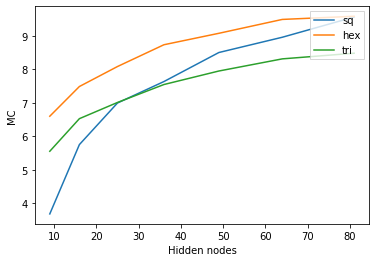

In [35]:
if 'mc_df' not in locals():
    mc_df = load_experiment('experiments/lattice_mc.pkl')

grouped_df = mc_df.groupby(['hidden_nodes', 'w_res_type']).mean().reset_index()

tetragonal = grouped_df.loc[grouped_df['w_res_type'] == 'tetragonal']
hexagonal = grouped_df.loc[grouped_df['w_res_type'] == 'hexagonal']
triangular = grouped_df.loc[grouped_df['w_res_type'] == 'triangular']

plt.plot(tetragonal['hidden_nodes'], tetragonal['esn_mc'], label='sq')
plt.plot(hexagonal['hidden_nodes'], hexagonal['esn_mc'], label='hex')
plt.plot(triangular['hidden_nodes'], triangular['esn_mc'], label='tri')

plt.legend(fancybox=False, loc='upper right', bbox_to_anchor=(1.0, 1.0))
plt.ylabel('MC')
plt.xlabel('Hidden nodes')

plt.show()

### Lattice input scaling

In [ ]:
from metric import esn_mc

params = OrderedDict()
params['hidden_nodes'] = [25, 36, 49, 64, 81]
params['input_scaling'] = np.arange(0.1, 2.1, 0.1)
params['w_res_type'] = ['tetragonal', 'hexagonal', 'triangular']
is_df = experiment(esn_mc, params)
is_df.to_pickle('experiments/lattice_input_scaling.pkl')

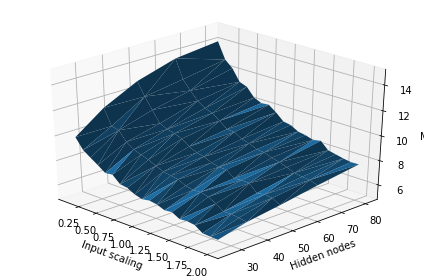

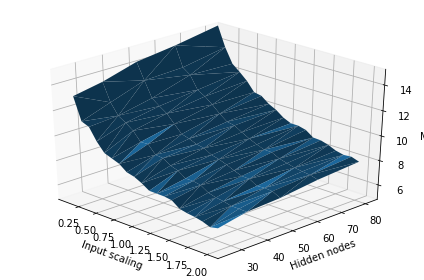

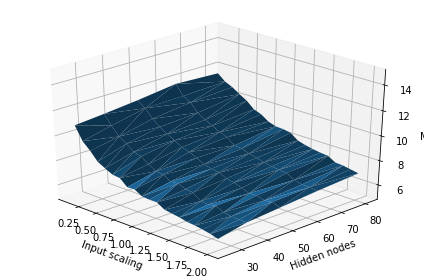

In [82]:
from plot import plot_df_trisurf

if 'is_df' not in locals():
    is_df = load_experiment('experiments/lattice_input_scaling.pkl')

tetragonal = is_df.loc[is_df['w_res_type'] == 'tetragonal']
hexagonal = is_df.loc[is_df['w_res_type'] == 'hexagonal']
triangular = is_df.loc[is_df['w_res_type'] == 'triangular']

labels = {'x': 'Input scaling', 'y': 'Hidden nodes', 'z': 'MC'}
zlim = (5, 15)

plot_df_trisurf(df=tetragonal, groupby=['hidden_nodes', 'input_scaling'],
                axes=['input_scaling', 'hidden_nodes', 'esn_mc'],
                labels=labels, zlim=zlim)

plot_df_trisurf(df=hexagonal, groupby=['hidden_nodes', 'input_scaling'],
                axes=['input_scaling', 'hidden_nodes', 'esn_mc'],
                labels=labels, zlim=zlim)

plot_df_trisurf(df=triangular, groupby=['hidden_nodes', 'input_scaling'],
                axes=['input_scaling', 'hidden_nodes', 'esn_mc'],
                labels=labels, zlim=zlim)

### Periodic lattice

In [51]:
from metric import esn_mc

params = OrderedDict()
params['hidden_nodes'] = [25, 36, 49, 64, 81]
params['periodic'] = [True, False]
params['w_res_type'] = ['tetragonal', 'hexagonal', 'triangular']
periodic_df = experiment(esn_mc, params)
periodic_df.to_pickle('experiments/periodic_lattice.pkl')

{'hidden_nodes': 25, 'periodic': True, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 25, 'periodic': True, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 25, 'periodic': True, 'w_res_type': 'triangular'}


{'hidden_nodes': 25, 'periodic': False, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 25, 'periodic': False, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 25, 'periodic': False, 'w_res_type': 'triangular'}


{'hidden_nodes': 36, 'periodic': True, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 36, 'periodic': True, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 36, 'periodic': True, 'w_res_type': 'triangular'}


{'hidden_nodes': 36, 'periodic': False, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 36, 'periodic': False, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 36, 'periodic': False, 'w_res_type': 'triangular'}


{'hidden_nodes': 49, 'periodic': True, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 49, 'periodic': True, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 49, 'periodic': True, 'w_res_type': 'triangular'}


{'hidden_nodes': 49, 'periodic': False, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 49, 'periodic': False, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 49, 'periodic': False, 'w_res_type': 'triangular'}


{'hidden_nodes': 64, 'periodic': True, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 64, 'periodic': True, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 64, 'periodic': True, 'w_res_type': 'triangular'}


{'hidden_nodes': 64, 'periodic': False, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 64, 'periodic': False, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 64, 'periodic': False, 'w_res_type': 'triangular'}


{'hidden_nodes': 81, 'periodic': True, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 81, 'periodic': True, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 81, 'periodic': True, 'w_res_type': 'triangular'}


{'hidden_nodes': 81, 'periodic': False, 'w_res_type': 'tetragonal'}


{'hidden_nodes': 81, 'periodic': False, 'w_res_type': 'hexagonal'}


{'hidden_nodes': 81, 'periodic': False, 'w_res_type': 'triangular'}


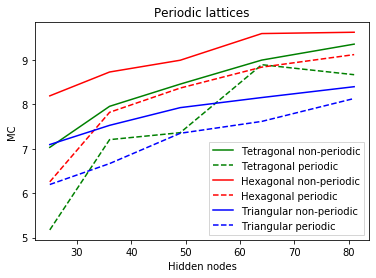

In [53]:
if 'periodic_df' not in locals():
    periodic_df = load_experiment('experiments/periodic_lattice.pkl')

grouped_df = periodic_df.groupby(['hidden_nodes', 'periodic', 'w_res_type']).mean().reset_index()

tetragonal = grouped_df.loc[(grouped_df['w_res_type'] == 'tetragonal') & (grouped_df['periodic'] == False)]
tetragonal_periodic = grouped_df.loc[(grouped_df['w_res_type'] == 'tetragonal') & (grouped_df['periodic'] == True)]

hexagonal = grouped_df.loc[(grouped_df['w_res_type'] == 'hexagonal') & (grouped_df['periodic'] == False)]
hexagonal_periodic = grouped_df.loc[(grouped_df['w_res_type'] == 'hexagonal') & (grouped_df['periodic'] == True)]

triangular = grouped_df.loc[(grouped_df['w_res_type'] == 'triangular') & (grouped_df['periodic'] == False)]
triangular_periodic = grouped_df.loc[(grouped_df['w_res_type'] == 'triangular') & (grouped_df['periodic'] == True)]

plt.title('Periodic lattices')
plt.ylabel('MC')
plt.xlabel('Hidden nodes')

plt.plot(tetragonal['hidden_nodes'], tetragonal['esn_mc'], label='Tetragonal non-periodic', color='green')
plt.plot(tetragonal_periodic['hidden_nodes'], tetragonal_periodic['esn_mc'], label='Tetragonal periodic', linestyle='--', color='green')

plt.plot(hexagonal['hidden_nodes'], hexagonal['esn_mc'], label='Hexagonal non-periodic', color='red')
plt.plot(hexagonal_periodic['hidden_nodes'], hexagonal_periodic['esn_mc'], label='Hexagonal periodic', linestyle='--', color='red')

plt.plot(triangular['hidden_nodes'], triangular['esn_mc'], label='Triangular non-periodic', color='blue')
plt.plot(triangular_periodic['hidden_nodes'], triangular_periodic['esn_mc'], label='Triangular periodic', linestyle='--', color='blue')

plt.legend(fancybox=False, loc='lower right', bbox_to_anchor=(1.0, 0.0))

plt.show()